In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


!pip install dabl

# Import train.csv and test.csv
import dabl

# Initialization
ufc_dataset_list = ['/kaggle/input/ultimate-ufc-dataset/most-recent-event.csv',
    '/kaggle/input/ultimate-ufc-dataset/ufc-master.csv',
    '/kaggle/input/ultimate-ufc-dataset/task-dummy.csv',
    '/kaggle/input/ultimate-ufc-dataset/upcoming-event.csv']

files = ufc_dataset_list
files_df = pd.DataFrame(files)
print("FDF",files_df.head())

X_mre = pd.read_csv('/kaggle/input/ultimate-ufc-dataset/most-recent-event.csv')
display('UFC Most Recent Dataset Info:', X_mre.info())
display('UFC Most Recent Dataset Describe:', X_mre.describe())
X_mre['gender'].head()
X_mre['gender'] = X_mre['gender'].str.lower()
display(X_mre['gender'].head())



/kaggle/input/ultimate-ufc-dataset/most-recent-event.csv
/kaggle/input/ultimate-ufc-dataset/ufc-master.csv
/kaggle/input/ultimate-ufc-dataset/task-dummy.csv
/kaggle/input/ultimate-ufc-dataset/upcoming-event.csv
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.0/559.0 kB 1.6 MB/s eta 0:00:00


/opt/conda/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


FDF                                                    0
0  /kaggle/input/ultimate-ufc-dataset/most-recent...
1  /kaggle/input/ultimate-ufc-dataset/ufc-master.csv
2  /kaggle/input/ultimate-ufc-dataset/task-dummy.csv
3  /kaggle/input/ultimate-ufc-dataset/upcoming-ev...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 119 entries, R_fighter to b_ko_odds
dtypes: bool(1), float64(49), int64(55), object(14)
memory usage: 10.3+ KB


'UFC Most Recent Dataset Info:'

None

'UFC Most Recent Dataset Describe:'

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,...,0.0,0.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,-77.727273,12.272727,122.603221,148.049801,3.181818,0.818182,0.818182,0.0,4.011818,0.480909,...,NaN,NaN,2.454545,668.818182,365.909091,395.454545,1134.090909,1311.818182,533.636364,478.181818
std,313.618906,322.787574,138.830878,129.219919,0.603023,0.873863,1.078720,0.0,1.833215,0.088595,...,NaN,NaN,1.128152,407.291497,229.845798,321.484483,788.849853,859.614078,512.177171,310.711061
min,-675.000000,-720.000000,14.814815,13.888889,3.000000,0.000000,0.000000,0.0,0.990000,0.340000,...,NaN,NaN,1.000000,80.000000,140.000000,-200.000000,275.000000,330.000000,-110.000000,120.000000
25%,-217.500000,-165.000000,50.115207,63.461538,3.000000,0.000000,0.000000,0.0,2.990000,0.405000,...,NaN,NaN,2.000000,456.500000,170.000000,212.500000,475.000000,900.000000,135.000000,242.500000
50%,-150.000000,130.000000,66.666667,130.000000,3.000000,1.000000,0.000000,0.0,3.420000,0.530000,...,NaN,NaN,2.000000,587.000000,300.000000,350.000000,700.000000,1100.000000,550.000000,400.000000
75%,140.000000,180.000000,140.000000,180.000000,3.000000,1.500000,1.500000,0.0,5.190000,0.555000,...,NaN,NaN,3.000000,900.000000,500.000000,525.000000,1800.000000,1500.000000,850.000000,600.000000
max,500.000000,475.000000,500.000000,475.000000,5.000000,2.000000,3.000000,0.0,7.880000,0.590000,...,NaN,NaN,5.000000,1500.000000,800.000000,900.000000,2500.000000,3500.000000,1600.000000,1100.000000


0    male
1    male
2    male
3    male
4    male
Name: gender, dtype: object

In [2]:
def value_counts_df(df, col):
    """
    Returns pd.value_counts() as a DataFrame

    Parameters
    ----------
    df : Pandas Dataframe
        Dataframe on which to run value_counts(), must have column `col`.
    col : str
        Name of column in `df` for which to generate counts

    Returns
    -------
    Pandas Dataframe
        Returned dataframe will have a single column named "count" which contains the count_values()
        for each unique value of df[col]. The index name of this dataframe is `col`.

    Example
    -------
    >>> value_counts_df(pd.DataFrame({'a':[1, 1, 2, 2, 2]}), 'a')
       count
    a
    2      3
    1      2
    """
    df = pd.DataFrame(df[col].value_counts())
    df.index.name = col
    df.columns = ['count']
    return df

X_mre_value_counts_df = value_counts_df(X_mre, 'weight_class')
print('*********************')
print('***value_counts_df***')
print('*********************')
display(X_mre_value_counts_df)

*********************
***value_counts_df***
*********************


,count
weight_class,
Lightweight,3
Women's Bantamweight,2
Bantamweight,2
Light Heavyweight,1
Welterweight,1
Middleweight,1
Women's Flyweight,1


In [3]:

""" 
continuous
categorical
date
Dirty_float
Low_card_int
free_string
Useless
"""
# Dabl uses a single line of Python code to automatically categorize all dataset features into the above data types.
X_mreClean = dabl.clean(X_mre, verbose = 1)
display('X_mreClean Shape:', X_mreClean.shape)

Detected feature types:
continuous      47
dirty_float      0
low_card_int     0
categorical     30
date             1
free_string      3
useless         38
dtype: int64


'X_mreClean Shape:'

(11, 81)

Target looks like classification
Showing only top 10 of 47 continuous features
Linear Discriminant Analysis training set score: 0.817
Showing only top 10 of 29 categorical features


/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]


[[<Figure size 1440x288 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

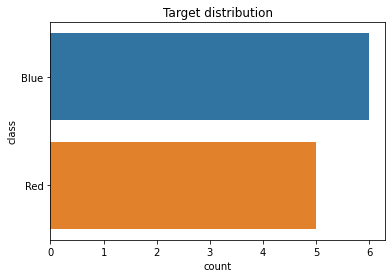

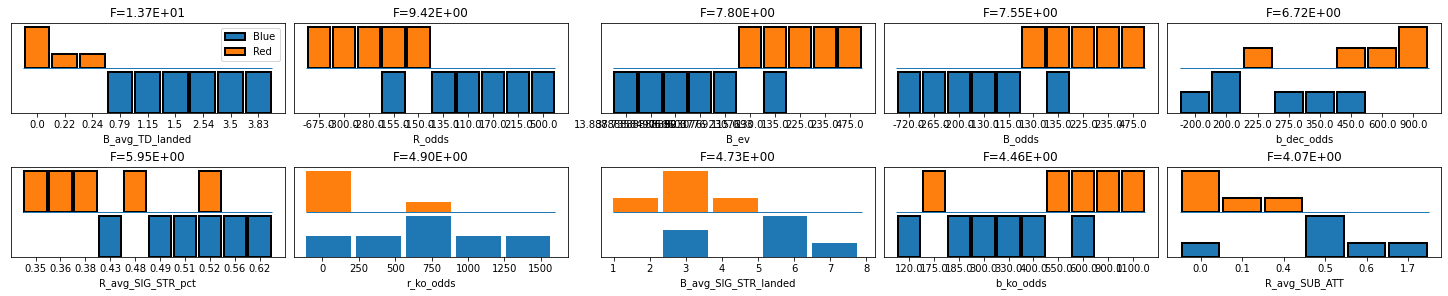

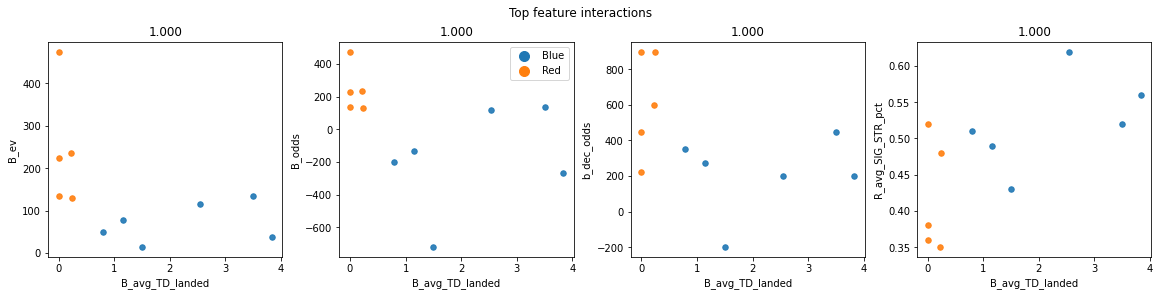

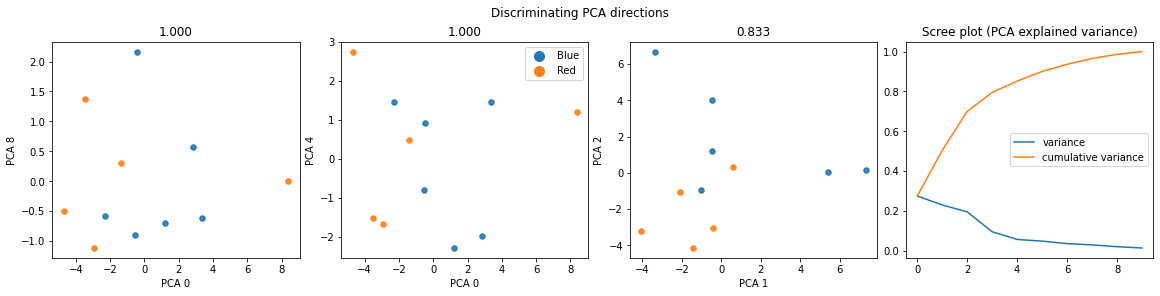

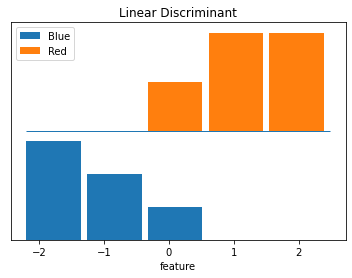

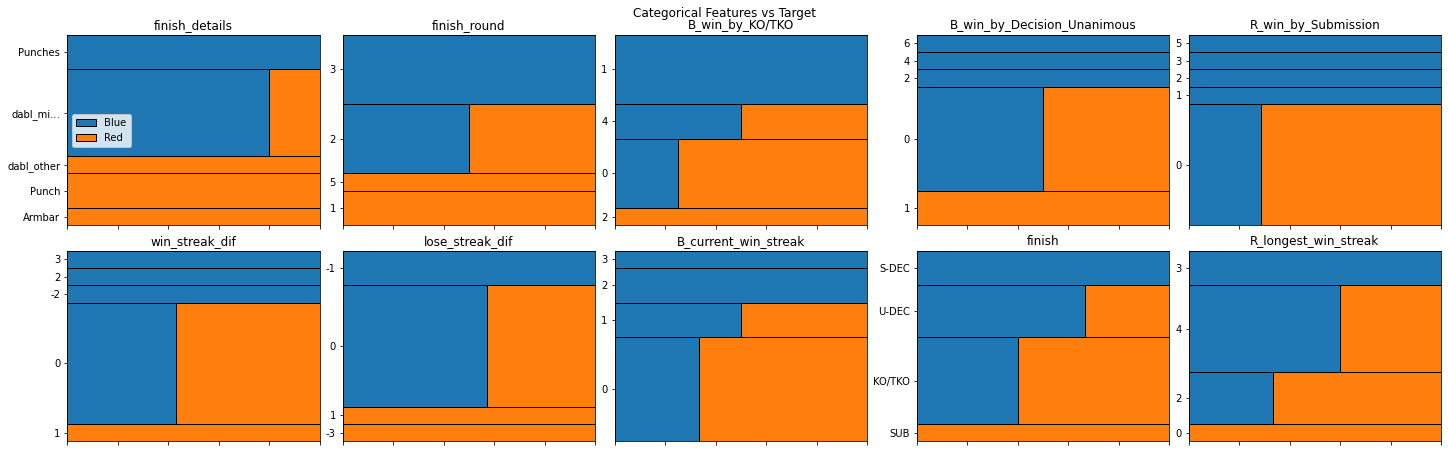

In [4]:
dabl.plot(X_mreClean, target_col="Winner")

In [5]:
fc = dabl.SimpleClassifier()
X = X_mreClean.drop("Winner", axis=1)
y = X_mreClean['Winner']
fc.fit(X, y) 

Running DummyClassifier()
accuracy: 0.533 average_precision: 0.467 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.347
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.533 average_precision: 0.467 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.347

Running GaussianNB()
accuracy: 0.633 average_precision: 0.600 roc_auc: 0.650 recall_macro: 0.650 f1_macro: 0.533
=== new best GaussianNB() (using recall_macro):
accuracy: 0.633 average_precision: 0.600 roc_auc: 0.650 recall_macro: 0.650 f1_macro: 0.533

Running MultinomialNB()
accuracy: 0.633 average_precision: 0.800 roc_auc: 0.700 recall_macro: 0.650 f1_macro: 0.600
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.833 average_precision: 0.800 roc_auc: 0.850 recall_macro: 0.850 f1_macro: 0.800
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.833 average_precision: 0.800 roc_auc: 0.850 recall_macro: 0.850 f1_macro: 0.800

Running Decision

SimpleClassifier()

In [6]:
Xufm = pd.read_csv('/kaggle/input/ultimate-ufc-dataset/ufc-master.csv')
display('UFC Master Dataset Info:', Xufm.info())
display('UFC Master Dataset Describe:', Xufm.describe())
Xufm['gender'] = Xufm['gender'].str.lower()
gender_num = {'male': 0, 'female':1}
Xufm['gender'] = Xufm['gender'].map(gender_num)
display(Xufm['gender'].head())
Xufm['weight_class'] = Xufm['weight_class'].str.lower()
display(Xufm['weight_class'].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Columns: 119 entries, R_fighter to b_ko_odds
dtypes: bool(1), float64(58), int64(46), object(14)
memory usage: 4.4+ MB


'UFC Master Dataset Info:'

None

'UFC Master Dataset Describe:'

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,...,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,...,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944643,0.571515,0.769386,1.311379,0.108333,20.935885,0.121332,...,4.259763,4.300283,0.996643,357.911423,230.583958,306.571299,550.126761,627.285034,413.622768,458.846643
min,-1700.000000,-1200.000000,5.882353,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000
25%,-255.000000,-145.000000,39.215686,68.965517,3.000000,0.000000,0.000000,0.000000,5.610000,0.387500,...,5.000000,5.000000,1.000000,297.000000,167.000000,225.000000,435.000000,590.000000,240.000000,325.000000
50%,-150.000000,130.000000,66.666667,130.000000,3.000000,0.000000,0.000000,0.000000,24.759615,0.450000,...,8.000000,10.000000,3.000000,900.000000,250.000000,349.000000,720.000000,975.000000,435.000000,548.500000
75%,126.500000,220.000000,126.500000,220.000000,3.000000,1.000000,1.000000,0.000000,39.075000,0.510000,...,12.000000,13.500000,3.000000,900.000000,400.000000,525.000000,1200.000000,1400.000000,700.000000,880.750000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2200.000000,2600.000000,4665.000000,4785.000000,2675.000000,3200.000000


0    0
1    0
2    0
3    0
4    0
Name: gender, dtype: int64

0    light heavyweight
1         welterweight
2         middleweight
3          lightweight
4          lightweight
Name: weight_class, dtype: object

In [7]:
weight_num = {"Bantamweight": 0,"Catch Weight": 1,"Featherweigh": 2,"Flyweight": 3, "Heavyweight" : 4, "Light Heavyweight": 5,"Lightweight" : 6,
"Middleweight": 7, "Welterweight": 8, "Women's Bantamweight": 9, "Women's Featherweight": 10, "Women's Flyweight": 11, "Women's Strawweight": 12}

Xufm['weight_class'] = Xufm['weight_class'].map(weight_num)
display(Xufm.head())
Xufm_value_counts_df = value_counts_df(Xufm, 'weight_class')
Xufm_value_counts_df_sorted = Xufm_value_counts_df.sort_values(by='weight_class')
display(Xufm_value_counts_df_sorted)
display(Xufm['weight_class'].head())




,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


,count
weight_class,


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: weight_class, dtype: float64

In [8]:
""" 
continuous
categorical
date
Dirty_float
Low_card_int
free_string
Useless
"""
# Dabl uses a single line of Python code to automatically categorize all dataset features into the above data types.
XufmClean = dabl.clean(Xufm, verbose = 1)
print(XufmClean.shape)

display(XufmClean.head())



Detected feature types:
continuous      58
dirty_float      0
low_card_int    33
categorical     10
date             2
free_string      3
useless         13
dtype: int64
(4896, 106)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


In [9]:
weight_num = {"Bantamweight": 0,"Catch Weight": 1,"Featherweigh": 2,"Flyweight": 3, "Heavyweight" : 4, "Light Heavyweight": 5,"Lightweight" : 6,
"Middleweight": 7, "Welterweight": 8, "Women's Bantamweight": 9, "Women's Featherweight": 10, "Women's Flyweight": 11, "Women's Strawweight": 12}

Target looks like classification
Showing only top 10 of 89 continuous features


/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column B_odds.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column R_odds.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:633: UserWarning: Dropped 3 outliers in column R_ev.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:633: UserWarning: Dropped 5 outliers in column B_ev.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:633: UserWarning: Dropped 3 outliers in column b_dec_odds.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column r_dec_odds.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:63

Linear Discriminant Analysis training set score: 0.635


/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t

[[<Figure size 1440x288 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

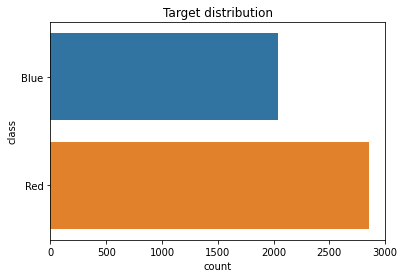

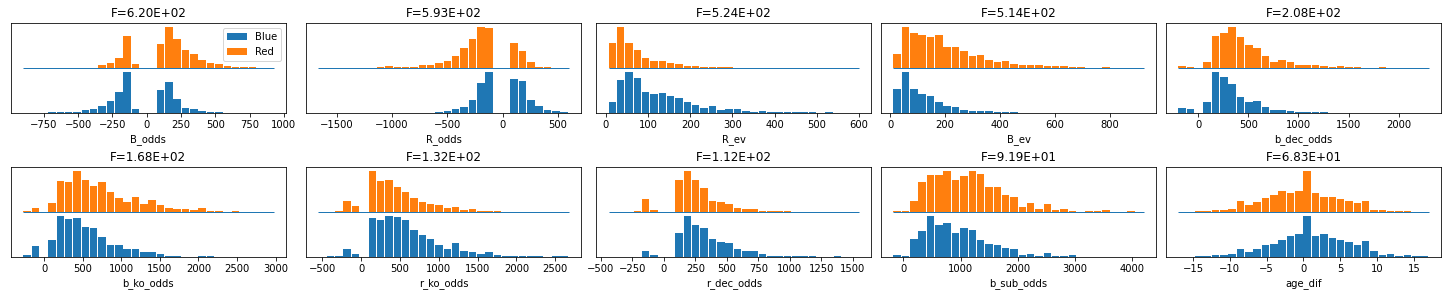

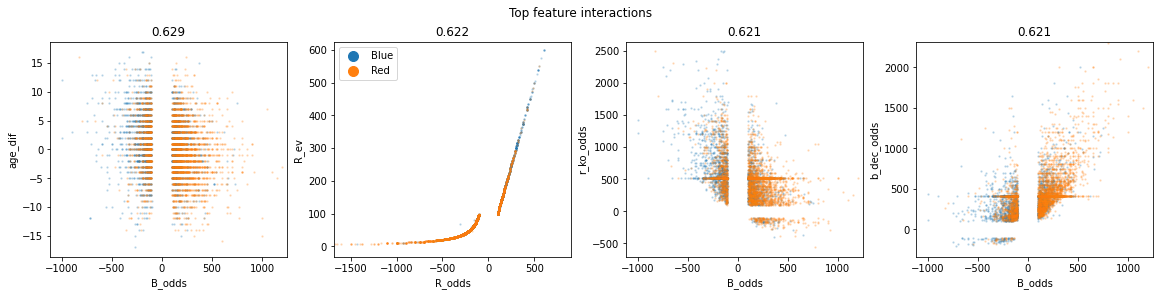

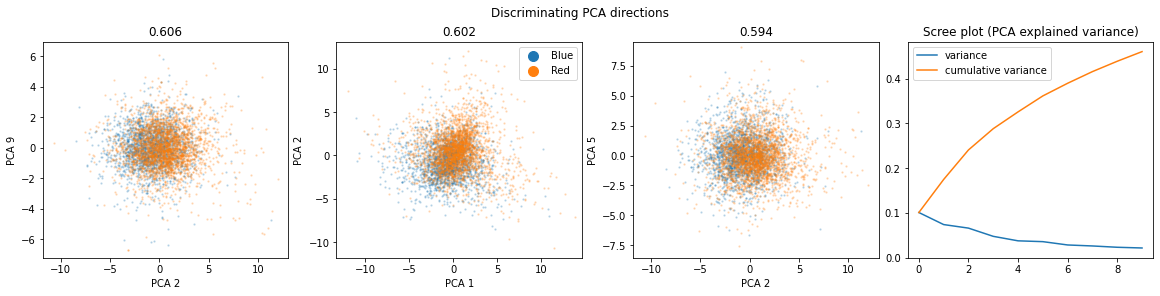

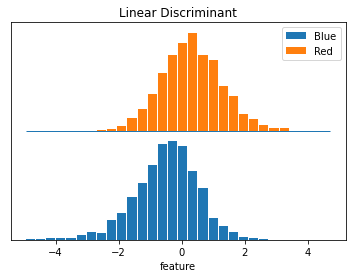

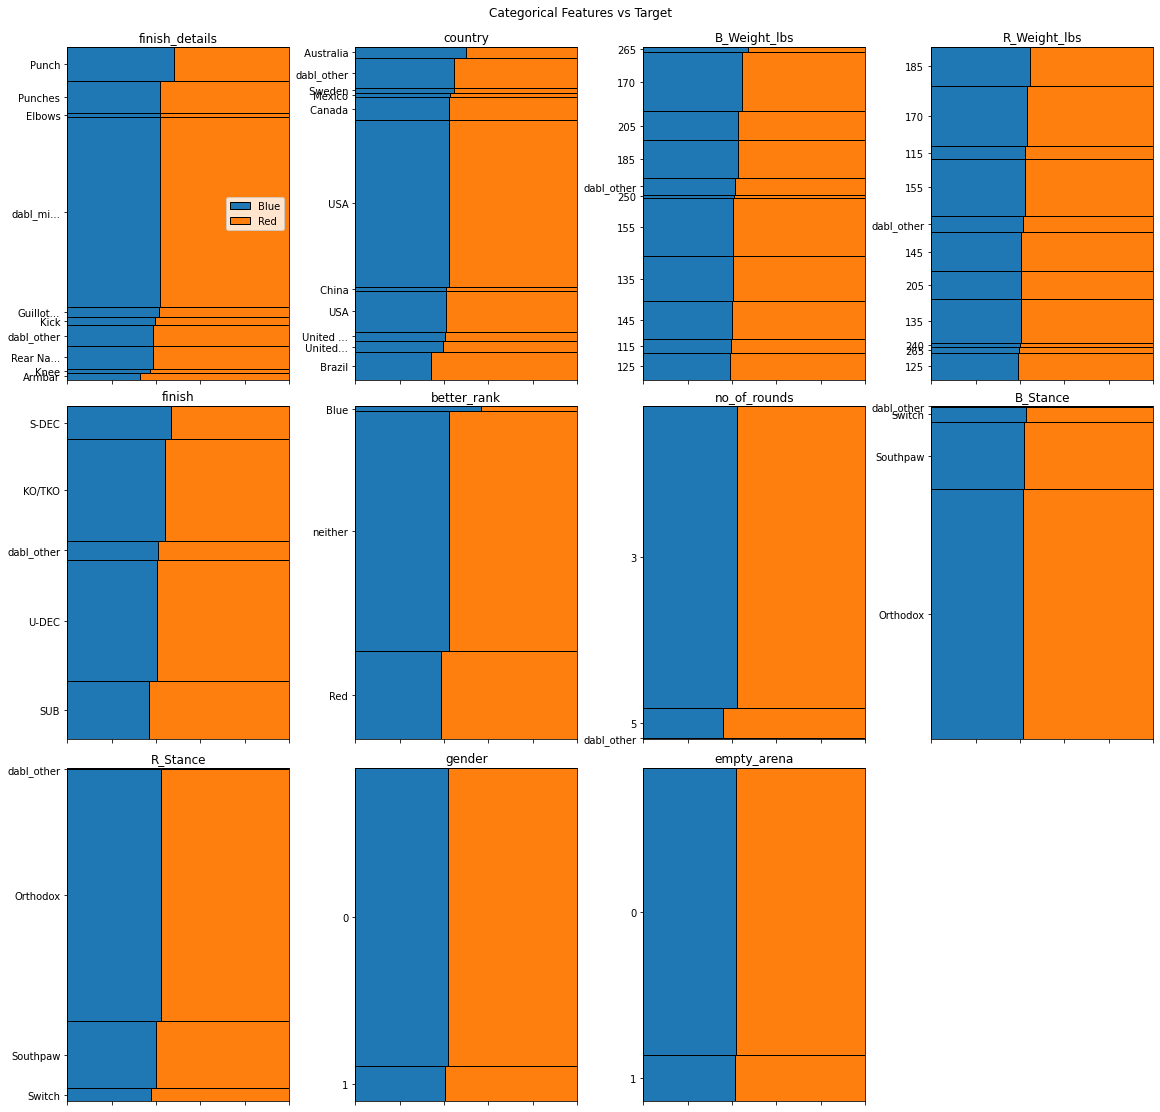

In [10]:
dabl.plot(XufmClean, target_col="Winner")

In [11]:
fm = dabl.SimpleClassifier()
X = XufmClean.drop("Winner", axis=1)
y = XufmClean['Winner']
fm.fit(X, y) 

Running DummyClassifier()
accuracy: 0.584 average_precision: 0.416 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.369
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.584 average_precision: 0.416 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.369

Running GaussianNB()
accuracy: 0.434 average_precision: 0.420 roc_auc: 0.578 recall_macro: 0.508 f1_macro: 0.353
=== new best GaussianNB() (using recall_macro):
accuracy: 0.434 average_precision: 0.420 roc_auc: 0.578 recall_macro: 0.508 f1_macro: 0.353

Running MultinomialNB()
accuracy: 0.576 average_precision: 0.498 roc_auc: 0.592 recall_macro: 0.552 f1_macro: 0.551
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.576 average_precision: 0.498 roc_auc: 0.592 recall_macro: 0.552 f1_macro: 0.551

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.618 average_precision: 0.504 roc_auc: 0.643 recall_macro: 0.643 f1_macro: 0.617
=== new best DecisionTreeClassifier(class_weight='balanced', 

SimpleClassifier()

In [12]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
import  builtins
weight_num = {"Bantamweight": 0,"Catch Weight": 1,"Featherweigh": 2,"Flyweight": 3, "Heavyweight" : 4, "Light Heavyweight": 5,"Lightweight" : 6,
"Middleweight": 7, "Welterweight": 8, "Women's Bantamweight": 9, "Women's Featherweight": 10, "Women's Flyweight": 11, "Women's Strawweight": 12}
print(X_mreClean.head())
gender_num = {'male': 0, 'female':1}
X_mreClean['gender'] = X_mreClean['gender'].map(gender_num)
X_mreClean['gender'].head()

list(weight_num)
col = X_mreClean.columns
display(col)

#X_mreClean

rfr = RandomForestRegressor()

num_col = X_mreClean._get_numeric_data().columns
len(num_col) 
num_col
num_var = pd.DataFrame(num_col)
print('NUM_V',num_var.head())


numeric_clmns =X_mreClean.dtypes[X_mreClean.dtypes != "object"].index 
len(numeric_clmns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state = 123)
cat = list(set(col) - set(num_col))
X_cat_y = X_mreClean[cat]

X_cat_y["finish_details"].unique()

             R_fighter        B_fighter  R_odds  B_odds        R_ev  \
0        Thiago Santos    Johnny Walker    -150     130   66.666667   
1        Alex Oliveira       Niko Price     170    -200  170.000000   
2       Misha Cirkunov  Krzysztof Jotko     110    -130  110.000000   
3  Alexander Hernandez     Mike Breeden    -675     475   14.814815   
4          Joe Solecki     Jared Gordon    -135     115   74.074074   

         B_ev Winner       weight_class gender no_of_rounds  ...  \
0  130.000000    Red  Light Heavyweight   male            5  ...   
1   50.000000   Blue       Welterweight   male            3  ...   
2   76.923077   Blue       Middleweight   male            3  ...   
3  475.000000    Red        Lightweight   male            3  ...   
4  115.000000   Blue        Lightweight   male            3  ...   

  finish_details finish_round  finish_round_time  total_fight_time_secs  \
0            NaN            5               5:00                   1500   
1            N

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'Winner',
       'weight_class', 'gender', 'no_of_rounds', 'B_current_lose_streak',
       'B_current_win_streak', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct',
       'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct',
       'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought',
       'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous',
       'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_wins', 'B_Stance',
       'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak',
       'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed',
       'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct',
       'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought',
       'R_total_title_bouts', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_wins', 'R_Stance', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs',
   

NUM_V                       0
0                R_odds
1                B_odds
2                  R_ev
3                  B_ev
4  B_avg_SIG_STR_landed


[NaN, 'Punch', 'Punches', 'Elbow', 'Armbar']
Categories (4, object): ['Armbar', 'Elbow', 'Punch', 'Punches']

In [13]:
X_cat_y["finish_details"].unique()

[NaN, 'Punch', 'Punches', 'Elbow', 'Armbar']
Categories (4, object): ['Armbar', 'Elbow', 'Punch', 'Punches']

In [14]:
from sklearn.preprocessing import LabelEncoder


label = LabelEncoder()
X_mreClean["R_Stance"] = label.fit_transform(X_mreClean["R_Stance"])
X_mreClean["gender"] = label.fit_transform(X_mreClean["gender"])
X_mreClean["Winner"] = label.fit_transform(X_mreClean["Winner"])
X_mreClean["better_rank"] = label.fit_transform(X_mreClean["better_rank"])
X_mreClean["weight_class"] = label.fit_transform(X_mreClean["R_fighter"])
X_mreClean["B_Stance"] = label.fit_transform(X_mreClean["B_Stance"])
X_mreClean["finish"] = label.fit_transform(X_mreClean["finish"])

In [15]:
from sklearn.preprocessing import LabelEncoder


label = LabelEncoder()
X_mreClean["B_Stance"] = label.fit_transform(X_mreClean["B_Stance"])
X_mreClean["B_current_lose_streak"] = label.fit_transform(X_mreClean["B_current_lose_streak"])
X_mreClean["B_current_win_streak"] = label.fit_transform(X_mreClean["B_current_win_streak"])
X_mreClean["B_fighter"] = label.fit_transform(X_mreClean["B_fighter"])
X_mreClean["B_match_weightclass_rank"] = label.fit_transform(X_mreClean["B_match_weightclass_rank"])
X_mreClean["B_win_by_Decision_Split"] = label.fit_transform(X_mreClean["B_win_by_Decision_Split"])
X_mreClean["B_win_by_Decision_Unanimous"] = label.fit_transform(X_mreClean["B_win_by_Decision_Unanimous"])
X_mreClean["B_win_by_KO/TKO"] = label.fit_transform(X_mreClean["B_win_by_KO/TKO"])
X_mreClean["B_win_by_Submission"] = label.fit_transform(X_mreClean["B_win_by_Submission"])
X_mreClean["R_Light Heavyweight_rank"] = label.fit_transform(X_mreClean["R_Light Heavyweight_rank"])
X_mreClean["R_Stance"] = label.fit_transform(X_mreClean["R_Stance"])
X_mreClean["R_current_lose_streak"] = label.fit_transform(X_mreClean["R_current_lose_streak"])
X_mreClean["R_current_win_streak"] = label.fit_transform(X_mreClean["R_current_win_streak"])
X_mreClean["R_draw"] = label.fit_transform(X_mreClean["R_draw"])
X_mreClean["R_fighter"] = label.fit_transform(X_mreClean["R_fighter"])
X_mreClean["R_longest_win_streak"] = label.fit_transform(X_mreClean["R_longest_win_streak"])
X_mreClean["R_total_title_bouts"] = label.fit_transform(X_mreClean["R_total_title_bouts"])
X_mreClean["R_win_by_Decision_Split"] = label.fit_transform(X_mreClean["R_win_by_Decision_Split"])
X_mreClean["R_win_by_Decision_Unanimous"] = label.fit_transform(X_mreClean["R_win_by_Decision_Unanimous"])
X_mreClean["R_win_by_Submission"] = label.fit_transform(X_mreClean["R_win_by_Submission"])
X_mreClean["Winner"] = label.fit_transform(X_mreClean["Winner"])
X_mreClean["better_rank"] = label.fit_transform(X_mreClean["better_rank"])
X_mreClean["finish"] = label.fit_transform(X_mreClean["finish"])
X_mreClean["finish_details"] = label.fit_transform(X_mreClean["finish_details"])
X_mreClean["finish_round"] = label.fit_transform(X_mreClean["finish_round"])
X_mreClean["finish_round_time"] = label.fit_transform(X_mreClean["finish_round_time"])
X_mreClean["longest_win_streak_dif"] = label.fit_transform(X_mreClean["longest_win_streak_dif"])
X_mreClean["lose_streak_dif"] = label.fit_transform(X_mreClean["lose_streak_dif"])
X_mreClean["no_of_rounds"] = label.fit_transform(X_mreClean["no_of_rounds"])
X_mreClean["sub_dif"] = label.fit_transform(X_mreClean["sub_dif"])
X_mreClean["total_title_bout_dif"] = label.fit_transform(X_mreClean["total_title_bout_dif"])
X_mreClean["weight_class"] = label.fit_transform(X_mreClean["weight_class"])
X_mreClean["win_streak_dif"] = label.fit_transform(X_mreClean["win_streak_dif"])





